In [47]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [48]:
## Install Pandas Data Reader
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable


In [49]:
df_amd=pdr.get_data_stooq('AMD')

In [50]:
df_amd

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-25,117.16,121.230,116.0421,121.06,127820983
2022-02-24,104.56,116.960,104.2600,116.61,142956572
2022-02-23,117.40,118.650,109.0400,109.76,120299433
2022-02-22,115.27,119.200,113.6100,115.65,141648454
2022-02-18,113.90,115.635,109.8900,113.83,114321231
...,...,...,...,...,...
2017-03-06,13.00,13.340,12.3800,13.04,114792418
2017-03-03,13.55,13.580,12.7900,13.03,161199137
2017-03-02,14.59,14.780,13.8700,13.90,100814623


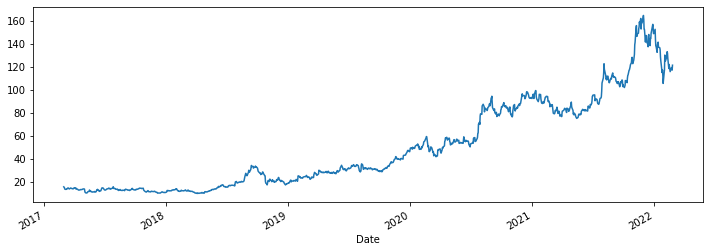

In [51]:
df_amd['High'].plot(figsize=(12,4))


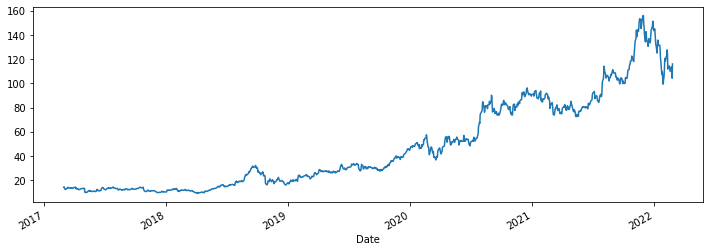

In [52]:
df_amd['Low'].plot(figsize=(12,4))

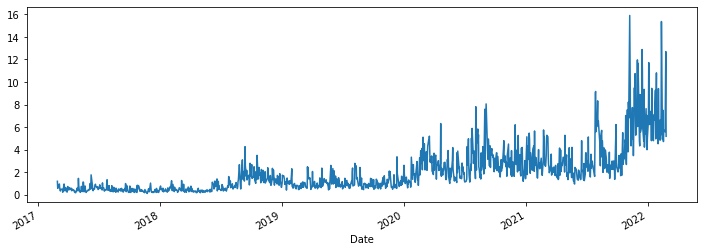

In [53]:
(df_amd['High'] - df_amd['Low']).plot(figsize=(12,4))

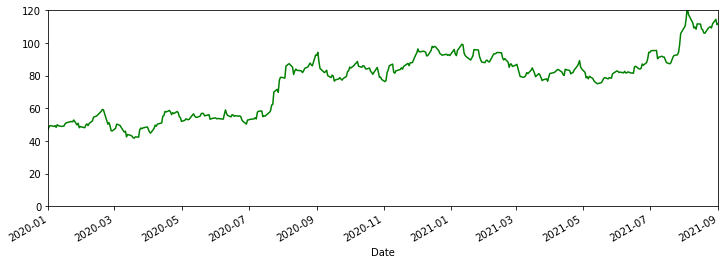

In [54]:
## xlimit and y limit
df_amd['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,120],ls='-',c='green',figsize=(12,4))

In [55]:
df_amd.index

DatetimeIndex(['2022-02-25', '2022-02-24', '2022-02-23', '2022-02-22',
               '2022-02-18', '2022-02-17', '2022-02-16', '2022-02-15',
               '2022-02-14', '2022-02-11',
               ...
               '2017-03-13', '2017-03-10', '2017-03-09', '2017-03-08',
               '2017-03-07', '2017-03-06', '2017-03-03', '2017-03-02',
               '2017-03-01', '2017-02-28'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [56]:
index=df_amd.loc['2020-01-01':'2021-09-01'].index

In [57]:
share_open=df_amd.loc['2020-01-01':'2021-09-01']['Open']

In [58]:
share_open

Date
2021-09-01    111.30
2021-08-31    111.26
2021-08-30    112.61
2021-08-27    108.01
2021-08-26    108.57
               ...  
2020-01-08     47.85
2020-01-07     49.35
2020-01-06     48.02
2020-01-03     48.03
2020-01-02     46.86
Name: Open, Length: 421, dtype: float64

In [60]:
# Delete all variables 
# %reset
# del x

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

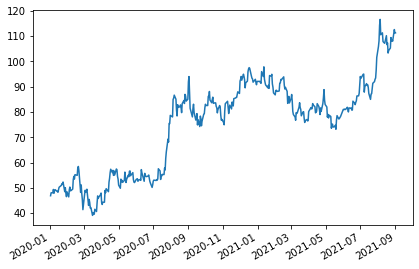

In [63]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)


In [64]:
df_amd=df_amd.reset_index()

In [65]:
df_amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Open    1259 non-null   float64       
 2   High    1259 non-null   float64       
 3   Low     1259 non-null   float64       
 4   Close   1259 non-null   float64       
 5   Volume  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [66]:
df_amd=df_amd.set_index('Date', drop=True)

In [67]:
df_amd.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-25,117.16,121.230,116.0421,121.06,127820983
2022-02-24,104.56,116.960,104.2600,116.61,142956572
2022-02-23,117.40,118.650,109.0400,109.76,120299433
2022-02-22,115.27,119.200,113.6100,115.65,141648454
2022-02-18,113.90,115.635,109.8900,113.83,114321231


In [69]:
## datetime
from datetime import datetime

Time Resampling

In [70]:
df_amd.resample(rule='A').min()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-31,9.89,10.0500,9.70,9.90,11035758
2018-12-31,9.08,9.7700,9.04,9.53,28875069
2019-12-31,17.55,18.6800,16.94,17.05,17609932
2020-12-31,39.08,41.7000,36.75,38.71,16705909
2021-12-31,73.16,75.0274,72.50,73.09,24310894
2022-12-31,101.55,105.4000,99.35,102.60,56589456


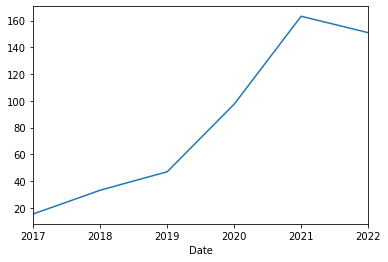

In [72]:
##year end frequency
df_amd.resample(rule='A').max()['Open'].plot()

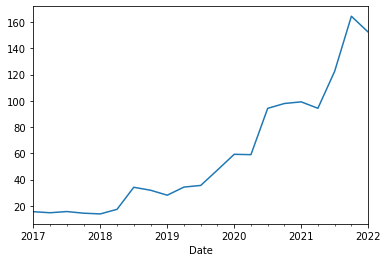

In [74]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_amd.resample(rule='QS').max()['High'].plot()

In [75]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_amd.resample(rule='BA').max()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-29,15.45,15.6500,14.520,14.96,267705403
2018-12-31,33.18,34.1400,32.190,32.72,325058416
2019-12-31,46.99,47.3100,45.975,46.63,211421150
2020-12-31,97.55,97.9800,96.250,97.12,205314531
2021-12-31,163.28,164.4599,156.100,161.91,225368699
2022-12-30,151.01,152.4200,145.020,150.24,180064993


In [76]:
df_amd.resample(rule='BQS').max()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02,15.45,15.5500,14.5200,14.96,161199137
2017-04-03,14.60,14.7400,14.3000,14.64,267705403
2017-07-03,15.13,15.6500,14.4000,14.76,235646236
2017-10-02,14.32,14.4100,14.1500,14.26,166437384
2018-01-01,13.62,13.8500,13.2100,13.74,174302560
2018-04-02,16.85,17.3400,16.3700,17.11,145284090
2018-07-02,33.18,34.1400,32.1900,32.72,325058416
2018-10-01,30.73,31.9100,30.2500,31.42,190137198
2019-01-01,27.54,28.1100,26.3300,27.89,211421150


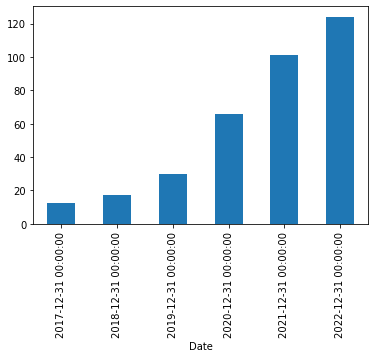

In [77]:
##plotting
df_amd['Open'].resample(rule='A').mean().plot(kind='bar')

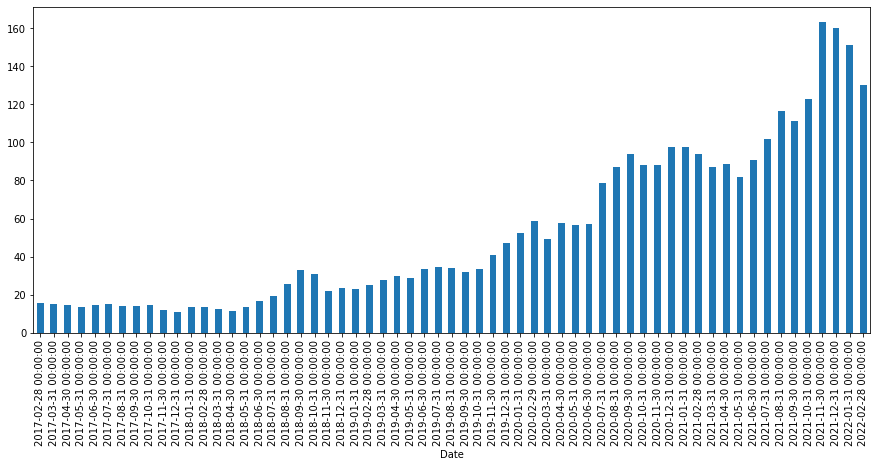

In [78]:
df_amd['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [84]:
df_amd['High'].rolling(11).max().head(30)

Date
2022-02-25         NaN
2022-02-24         NaN
2022-02-23         NaN
2022-02-22         NaN
2022-02-18         NaN
2022-02-17         NaN
2022-02-16         NaN
2022-02-15         NaN
2022-02-14         NaN
2022-02-11         NaN
2022-02-10    131.7589
2022-02-09    132.9600
2022-02-08    132.9600
2022-02-07    132.9600
2022-02-04    132.9600
2022-02-03    132.9600
2022-02-02    132.9600
2022-02-01    132.9600
2022-01-31    132.9600
2022-01-28    132.9600
2022-01-27    132.9600
2022-01-26    132.9600
2022-01-25    130.0600
2022-01-24    130.0600
2022-01-21    130.0600
2022-01-20    130.0600
2022-01-19    134.5700
2022-01-18    136.3893
2022-01-14    137.0000
2022-01-13    141.2500
Name: High, dtype: float64

In [85]:
df_amd['Open:30 days rolling']=df_amd['Open'].rolling(30).mean()

In [87]:
df_amd.head(31)

,Open,High,Low,Close,Volume,Open:30 days rolling
Date,,,,,,
2022-02-25,117.160,121.2300,116.0421,121.06,127820983,NaN
2022-02-24,104.560,116.9600,104.2600,116.61,142956572,NaN
2022-02-23,117.400,118.6500,109.0400,109.76,120299433,NaN
2022-02-22,115.270,119.2000,113.6100,115.65,141648454,NaN
2022-02-18,113.900,115.6350,109.8900,113.83,114321231,NaN
2022-02-17,116.260,116.9800,112.2600,112.37,98179641,NaN
2022-02-16,119.050,119.5400,114.2200,117.69,119109631,NaN
2022-02-15,117.190,121.8800,114.3600,121.47,144139671,NaN
2022-02-14,115.510,118.3700,113.4600,114.27,135146410,NaN


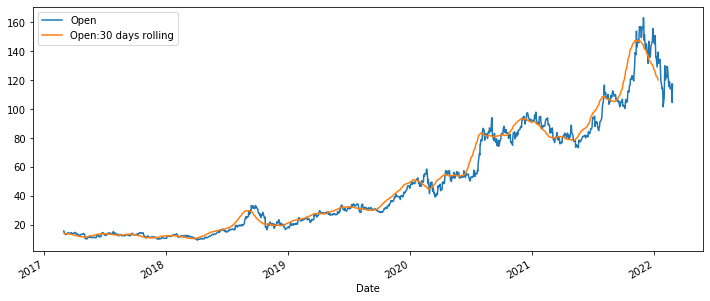

In [89]:
df_amd[['Open','Open:30 days rolling']].plot(figsize=(12,5))